- визуализировать распределения на train/test
- координаты

In [1]:
# !pip install pandas-bokeh

In [2]:
import numpy as np

In [3]:
import pandas as pd
pd.set_option('max_columns', 500)
import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [4]:
import pandas as pd
import cufflinks as cf
from IPython.display import display,HTML
#making all charts public and setting a global theme
cf.set_config_file(sharing='public',theme='white',offline=True)

# iplot

In [5]:
import plotly.express as px

In [6]:
from plotly.figure_factory import create_distplot

In [7]:
pd.options.plotting.backend = "plotly"

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [10]:
# nifty_data = pd.read_csv('data/NIFTY_data_2020.csv',parse_dates=["Date"],index_col='Date')
# nifty_data.head()

In [11]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [12]:
test_id = test['id']

In [13]:
train['is_train'] = True
test['is_train'] = False

# add
train = train[train['price_type'] == 1]

target_var = 'per_square_meter_price'

X_train, y_train = train.drop(target_var, axis=1), train[target_var]


# y_train = np.log(y_train)
X_test = test.copy()

df = pd.concat([X_train, X_test])

In [14]:
df = df.drop(['id', 'date', 'street'] + ['floor'], axis=1)

In [15]:
point_cols = [c for c in df.columns if 'points_in_' in c]
reform_cols = [c for c in df.columns if 'reform_' in c]

In [16]:
# df[reform_cols].describe()

In [17]:
# df.columns

In [18]:
# df = df.drop(point_cols, axis=1)
# df = df.drop(reform_cols, axis=1)

In [19]:
df.head()

city        lat         lng  osm_amenity_points_in_0.001  \
275299  Красноярск  56.063615   92.958428                            0   
275300     Саратов  51.534581   46.020549                           13   
275301  Красноярск  56.026884   92.818323                            3   
275302     Иркутск  52.275528  104.251444                            0   
275303    Белгород  50.576545   36.584197                            4   

        osm_amenity_points_in_0.005  osm_amenity_points_in_0.0075  \
275299                            7                            14   
275300                          198                           345   
275301                           15                            23   
275302                           10                            26   
275303                           48                            73   

        osm_amenity_points_in_0.01  osm_building_points_in_0.001  \
275299                          26                             0   
275300                         462                             0   
275301                          33                             0   
275302                          40                             0   
275303                          92                             0   

        osm_building_points_in_0.005  osm_building_points_in_0.0075  \
275299                             0                              0   
275300                             0                              0   
275301                             0                              0   
275302                             1                              1   
275303                             0                              6   

        osm_building_points_in_0.01  osm_catering_points_in_0.001  \
275299                            0                             0   
275300                            0                             4   
275301                            0                             0   
275302                            1                             0   
275303                            6                             1   

        osm_catering_points_in_0.005  osm_catering_points_in_0.0075  \
275299                             0                              0   
275300                            44                             66   
275301                             1                              3   
275302                             2                              6   
275303                             7                             11   

        osm_catering_points_in_0.01  osm_city_closest_dist  \
275299                            2               7.795659   
275300                           89               0.987160   
275301                            4               3.730568   
275302                            8               2.344310   
275303                           15               2.170184   

       osm_city_nearest_name  osm_city_nearest_population  \
275299            Красноярск                    1095286.0   
275300               Саратов                     842097.0   
275301            Красноярск                    1095286.0   
275302               Иркутск                     623562.0   
275303              Белгород                     384425.0   

        osm_crossing_closest_dist  osm_crossing_points_in_0.001  \
275299                   0.041323                             2   
275300                   0.144936                             0   
275301                   0.141526                             0   
275302                   0.281491                             0   
275303                   0.065996                             1   

        osm_crossing_points_in_0.005  osm_crossing_points_in_0.0075  \
275299                             6                             25   
275300                             4                             34   
275301                            16                             35   
275302                             6             

# cities

In [20]:
cities_all = pd.read_csv('data/cities_all.csv')
cities_all = cities_all[['city', 'geo_lat', 'geo_lon', 'population', 'last5y_chg', 'last10y_chg',
                        'federal_district', 'region_type', 'region', 'area']]

In [21]:
d = {'Артем': "Артём",
   'Королев': "Королёв",
   'Орел': "Орёл",
   'Щелково': "Щёлково"}

cities_all.city = cities_all.city.apply(lambda x: d.get(x,x))

In [22]:
cities_all = cities_all.reset_index()
# cities_all['population'] = cities_all['population'] * 1000

In [23]:
cities_100 = cities_all[cities_all.last5y_chg.notnull()]
cities_100 = cities_100.reset_index(drop=True)
cities_100.columns = ['index'] + [c+"_100" for c in cities_100.columns[1:]]

In [24]:
cities_all.columns = ['index'] + [c+"_CT" for c in cities_all.columns[1:]]

In [25]:
len(set(train.city) - set(cities_all.city_CT)), len(set(train.city))

(21, 190)

In [26]:
cities_100[cities_100.city_100=='Химки']

index city_100  geo_lat_100  geo_lon_100  population_100  last5y_chg_100  \
85    571    Химки    55.888657     37.43037        258000.0             7.5   

    last10y_chg_100 federal_district_100 region_type_100  region_100 area_100  
85            23.44          Центральный             обл  Московская      NaN

In [27]:
set(df.osm_city_nearest_name)- set(cities_100.city_100)

{'Великие Луки',
 'Воткинск',
 'Горно-Алтайск',
 'Зеленоград',
 'Колпино',
 'Нарьян-Мар',
 'Пушкин',
 'Сарапул',
 'Сергиев Посад',
 'Серов',
 'Соликамск',
 'Тобольск',
 'Узловая',
 '饶河县'}

## all

In [28]:
import pandas as pd
import numpy as np

from sklearn.neighbors import BallTree
from io import StringIO

# # Create DataFrame from you lat/lon dataset
# data = """NAME Latitude Longitude
# B 58.010258 56.234203
# """

# Use StringIO to allow reading of string as CSV
# df = pd.read_csv(StringIO(data), sep = ' ')
df_right = cities_all.copy()

# Setup Balltree using df as reference dataset
# Use Haversine calculate distance between points on the earth from lat/long
# haversine - https://pypi.org/project/haversine/ 
tree = BallTree(np.deg2rad(df_right[['geo_lat_CT', 'geo_lon_CT']].values), metric='haversine')

# Setup distance queries (points for which we want to find nearest neighbors)
# other_data = """NAME Latitude Longitude
# C_alt C 57.94387008249369 56.0545496986542"""

# df_other = pd.read_csv(StringIO(other_data), sep = ' ')
df_left = df.copy()

query_lats = df_left['lat']
query_lons = df_left['lng']

# Find closest city in reference dataset for each in df_other
# use k = 3 for 3 closest neighbors
distances, indices = tree.query(np.deg2rad(np.c_[query_lats, query_lons]), k = 1)

r_km = 6371 # multiplier to convert to km (from unit distance)

ind_closest = []

for name, d, ind in zip(df_left.index, distances, indices):
#     print(f"NAME {name} closest matches:")
#     for i, index in enumerate(ind):
#         print(f"\t{df.index[index]} with distance {d[i]*r_km:.4f} km")
    for i, index in enumerate(ind):
        ind_closest.append(df_right['index'][index])

In [29]:
# train = train.drop_duplicates('city')

In [30]:
df['index'] = ind_closest

In [31]:
df = df.merge(cities_all, on='index', how='left')

In [32]:
df = df.drop('index', axis=1)

In [33]:
len(df[df.city!=df.city_CT])/len(df)

0.03910539708048748

In [34]:
df[df.city!=df.city_CT]

city        lat        lng  osm_amenity_points_in_0.001  \
59    Железногорск  56.250609  93.533110                            2   
97    Железногорск  56.246690  93.523842                            2   
108           Орел  52.974262  36.057493                            1   
110           Орел  52.981993  36.110540                            0   
128   Железногорск  56.253154  93.539255                            2   
...            ...        ...        ...                          ...   
7449   Яблоновский  44.995934  38.931280                            0   
7450   Яблоновский  44.995934  38.931977                            0   
7451   Яблоновский  44.995934  38.931993                            0   
7452   Яблоновский  44.995934  38.931951                            0   
7453   Яблоновский  44.970051  38.937925                            3   

      osm_amenity_points_in_0.005  osm_amenity_points_in_0.0075  \
59                             78                           126   
97                             60                           110   
108                            40                            82   
110                             7                            11   
128                            42                            96   
...                           ...                           ...   
7449                           16                            31   
7450                           16                            31   
7451                           16                            31   
7452                           16                            31   
7453                            8                             8   

      osm_amenity_points_in_0.01  osm_building_points_in_0.001  \
59                           191                             0   
97                           157                             0   
108                          113                             0   
110                           16                             0   
128                          138                             0   
...                          ...                           ...   
7449                          34                             0   
7450                          34                             0   
7451                          34                             0   
7452                          34                             0   
7453                           8                             0   

      osm_building_points_in_0.005  osm_building_points_in_0.0075  \
59                               5                              8   
97                               3                              5   
108                              0                              0   
110                              0                              0   
128                              6                             10   
...                            ...                            ...   
7449                             0                              0   
7450                             0                              0   
7451                             0                              0   
7452                             0                              0   
7453                             0                              0   

      osm_building_points_in_0.01  osm_catering_points_in_0.001  \
59                             12                             0   
97                              9                             0   
108                             0                             0   
110                             0                             0   
128                            13                             0   
...                           ...                           ...   
7449                            1                             0   
7450                            1                             0   
7451                            1                             0   
7452                            1       

In [35]:
df.head()

city        lat         lng  osm_amenity_points_in_0.001  \
0  Красноярск  56.063615   92.958428                            0   
1     Саратов  51.534581   46.020549                           13   
2  Красноярск  56.026884   92.818323                            3   
3     Иркутск  52.275528  104.251444                            0   
4    Белгород  50.576545   36.584197                            4   

   osm_amenity_points_in_0.005  osm_amenity_points_in_0.0075  \
0                            7                            14   
1                          198                           345   
2                           15                            23   
3                           10                            26   
4                           48                            73   

   osm_amenity_points_in_0.01  osm_building_points_in_0.001  \
0                          26                             0   
1                         462                             0   
2                          33                             0   
3                          40                             0   
4                          92                             0   

   osm_building_points_in_0.005  osm_building_points_in_0.0075  \
0                             0                              0   
1                             0                              0   
2                             0                              0   
3                             1                              1   
4                             0                              6   

   osm_building_points_in_0.01  osm_catering_points_in_0.001  \
0                            0                             0   
1                            0                             4   
2                            0                             0   
3                            1                             0   
4                            6                             1   

   osm_catering_points_in_0.005  osm_catering_points_in_0.0075  \
0                             0                              0   
1                            44                             66   
2                             1                              3   
3                             2                              6   
4                             7                             11   

   osm_catering_points_in_0.01  osm_city_closest_dist osm_city_nearest_name  \
0                            2               7.795659            Красноярск   
1                           89               0.987160               Саратов   
2                            4               3.730568            Красноярск   
3                            8               2.344310               Иркутск   
4                           15               2.170184              Белгород   

   osm_city_nearest_population  osm_crossing_closest_dist  \
0                    1095286.0                   0.041323   
1                     842097.0                   0.144936   
2                    1095286.0                   0.141526   
3                     623562.0                   0.281491   
4                     384425.0                   0.065996   

   osm_crossing_points_in_0.001  osm_crossing_points_in_0.005  \
0                             2                             6   
1                             0                             4   
2                             0                            16   
3                             0                             6   
4                             1                            19   

   osm_crossing_points_in_0.0075  osm_crossing_points_in_0.01  \
0                             25                           35   
1                             34                           59   
2                             35                           56   
3                              6                            6   
4                             28                           46   

   osm_culture_points_in_0.

In [36]:
from math import *

def distance(x,y):
    """
    Параметры
    ----------
    x : tuple, широта и долгота первой геокоординаты 
    y : tuple, широта и долгота второй геокоординаты 
    
    Результат
    ----------
    result : дистанция в километрах между двумя геокоординатами
    """
    R = 6371.0 # радиус земли в километрах

    lat_a, long_a, lat_b, long_b = map(radians, [*x,*y])    
    
    dlon = long_b - long_a
    dlat = lat_b - lat_a
    a = sin(dlat/2)**2 + cos(lat_a) * cos(lat_b) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a)) # c = 2 * asin(sqrt(a)) # the same 
    return R * c


In [37]:
import pyproj

geodesic = pyproj.Geod(ellps='WGS84')

def azimuth(lat1, long1, lat2, long2):
    fwd_azimuth, _, _ = geodesic.inv(lat1, long1, lat2, long2)
#     distance = distance/1000
    return fwd_azimuth

In [38]:
df['dist_closest_city_CT']= df.apply(lambda x: distance((x['lat'], x['lng']), (x['geo_lat_CT'], x['geo_lon_CT'])), axis=1)
df['fwd_azimuth_CT']= df.apply(lambda x: azimuth(x['lat'], x['lng'], x['geo_lat_CT'], x['geo_lon_CT']), axis=1)

## 100

In [39]:
import pandas as pd
import numpy as np

from sklearn.neighbors import BallTree
from io import StringIO

# # Create DataFrame from you lat/lon dataset
# data = """NAME Latitude Longitude
# B 58.010258 56.234203
# """

# Use StringIO to allow reading of string as CSV
# df = pd.read_csv(StringIO(data), sep = ' ')
df_right = cities_100.copy()

# Setup Balltree using df as reference dataset
# Use Haversine calculate distance between points on the earth from lat/long
# haversine - https://pypi.org/project/haversine/ 
tree = BallTree(np.deg2rad(df_right[['geo_lat_100', 'geo_lon_100']].values), metric='haversine')

# Setup distance queries (points for which we want to find nearest neighbors)
# other_data = """NAME Latitude Longitude
# C_alt C 57.94387008249369 56.0545496986542"""

# df_other = pd.read_csv(StringIO(other_data), sep = ' ')
df_left = df.copy()

query_lats = df_left['lat']
query_lons = df_left['lng']

# Find closest city in reference dataset for each in df_other
# use k = 3 for 3 closest neighbors
distances, indices = tree.query(np.deg2rad(np.c_[query_lats, query_lons]), k = 1)

r_km = 6371 # multiplier to convert to km (from unit distance)

ind_closest = []

for name, d, ind in zip(df_left.index, distances, indices):
#     print(f"NAME {name} closest matches:")
#     for i, index in enumerate(ind):
#         print(f"\t{df.index[index]} with distance {d[i]*r_km:.4f} km")
    for i, index in enumerate(ind):
        ind_closest.append(df_right['index'][index])

In [40]:
df['index'] = ind_closest

In [41]:
df = df.merge(cities_100, on='index', how='left')

In [42]:
df = df.drop('index', axis=1)

In [43]:
len(df[df.osm_city_nearest_name!=df.city_100])/len(df)

0.02718628632650328

In [44]:
df['osm_city_nearest_name'].nunique()

119

In [45]:
df['dist_closest_city_100']= df.apply(lambda x: distance((x['lat'], x['lng']), (x['geo_lat_100'], x['geo_lon_100'])), axis=1)
df['fwd_azimuth_100']= df.apply(lambda x: azimuth(x['lat'], x['lng'], x['geo_lat_100'], x['geo_lon_100']), axis=1)

In [46]:
df[df.osm_city_nearest_name!=df.city_100].head()

city        lat         lng  osm_amenity_points_in_0.001  \
177      Вязьма  55.213161   34.299375                            2   
190  Чайковский  56.773052   54.143553                            6   
214      Саянск  54.106534  102.156493                            0   
250      Москва  55.983911   37.217316                            0   
251      Москва  55.981711   37.212576                            0   

     osm_amenity_points_in_0.005  osm_amenity_points_in_0.0075  \
177                           11                            20   
190                           90                           138   
214                            8                            13   
250                            9                            21   
251                            9                            21   

     osm_amenity_points_in_0.01  osm_building_points_in_0.001  \
177                          42                             0   
190                         167                             0   
214                          22                             0   
250                          47                             0   
251                          47                             0   

     osm_building_points_in_0.005  osm_building_points_in_0.0075  \
177                             0                              0   
190                             0                              1   
214                             0                              0   
250                             0                              0   
251                             0                              0   

     osm_building_points_in_0.01  osm_catering_points_in_0.001  \
177                            0                             0   
190                            1                             1   
214                            0                             0   
250                            0                             0   
251                            0                             0   

     osm_catering_points_in_0.005  osm_catering_points_in_0.0075  \
177                             0                              1   
190                            11                             16   
214                             0                              0   
250                             1                              3   
251                             1                              3   

     osm_catering_points_in_0.01  osm_city_closest_dist osm_city_nearest_name  \
177                            2             219.423248                Брянск   
190                           19              32.091091              Воткинск   
214                            0             229.767471                Братск   
250                           10               1.700934            Зеленоград   
251                           10               1.700934            Зеленоград   

     osm_city_nearest_population  osm_crossing_closest_dist  \
177                     406553.0                   0.196696   
190                      98063.0                   0.108402   
214                     231602.0                   0.099047   
250                     223902.0                   0.179699   
251                     223902.0                   0.179699   

     osm_crossing_points_in_0.001  osm_crossing_points_in_0.005  \
177                             0                             2   
190                             1                            24   
214                             0                             3   
250                             0                             8   
251                             0                             8   

     osm_crossing_points_in_0.0075  osm_crossing_points_in_0.01  \
177                              7                           14   
190                             33                           41   
214                              7                           18   
250                             10          

## !!!

In [47]:
df['city_CT_EQUAL_city_100'] = (df['city_CT'] == df['city_100']).astype(int)

df['federal_district_CT_EQUAL_federal_district_100'] = (df['federal_district_CT'] == df['federal_district_100']).astype(int)
df['region_type_CT_EQUAL_region_type_100'] = (df['region_type_CT'] == df['region_type_100']).astype(int)
df['region_CT_EQUAL_region_100'] = (df['region_CT'] == df['region_100']).astype(int)
df['area_CT_EQUAL_area_100'] = (df['area_CT'] == df['area_100']).astype(int)

df['city'] = df['city_CT']
df = df.drop('city_CT', axis=1)

In [48]:
# df['region_type_CT_EQUAL_region_type_100'].value_counts()

In [49]:
df = df.drop([
            # 'population_CT', 
              'last5y_chg_CT', 'last10y_chg_CT', 
              'osm_city_closest_dist', "osm_city_nearest_name", "osm_city_nearest_population", # _100 - аналог
              'geo_lat_CT', 'geo_lon_CT', 'geo_lat_100', 'geo_lon_100',
            'federal_district_100', 'region_type_100', 'region_100', 'area_100',
             ], axis=1)

In [50]:
df['dist_closest_city_100_DIV_dist_closest_city_CT'] = (df['dist_closest_city_CT'] - df['dist_closest_city_100'])/(df['dist_closest_city_100']+1) * -100

df['population_CT_DIV_population_100'] = (df['population_CT'] - df['population_100'])/(df['population_100']+1) * -100

# main

In [51]:
CATEGORICAL_STE_FEATURES = ['region', 'city', 'realty_type'] + ['city_100'] + ['federal_district_CT', 'region_type_CT', 'region_CT', 'area_CT']

In [52]:
df['region_CT'].value_counts()[:10]

Красноярский                     1030
Иркутская                         739
Санкт-Петербург                   539
Кемеровская область - Кузбасс     390
Томская                           371
Свердловская                      348
Карелия                           325
Нижегородская                     273
Курская                           231
Новосибирская                     216
Name: region_CT, dtype: int64

In [53]:
train['region'].value_counts(1)

Красноярский край          0.132206
Иркутская область          0.101046
Санкт-Петербург            0.079234
Кемеровская область        0.056978
Томская область            0.050968
Свердловская область       0.046739
Карелия                    0.040285
Нижегородская область      0.038282
Курская область            0.030269
Новосибирская область      0.029602
Калужская область          0.027376
Брянская область           0.027153
Белгородская область       0.026263
Орловская область          0.023147
Омская область             0.020476
Москва                     0.020254
Пермский край              0.018251
Калининградская область    0.016247
Башкортостан               0.015135
Саратовская область        0.014022
Самарская область          0.013799
Ханты-Мансийский АО        0.012909
Ивановская область         0.012464
Челябинская область        0.012464
Алтайский край             0.012241
Ленинградская область      0.012019
Приморский край            0.011351
Тюменская область          0

In [54]:
train[train.price_type==0]['region'].value_counts(1)

Series([], Name: region, dtype: float64)

In [55]:
train[train.price_type==1]['region'].value_counts()

Красноярский край          594
Иркутская область          454
Санкт-Петербург            356
Кемеровская область        256
Томская область            229
Свердловская область       210
Карелия                    181
Нижегородская область      172
Курская область            136
Новосибирская область      133
Калужская область          123
Брянская область           122
Белгородская область       118
Орловская область          104
Омская область              92
Москва                      91
Пермский край               82
Калининградская область     73
Башкортостан                68
Саратовская область         63
Самарская область           62
Ханты-Мансийский АО         58
Ивановская область          56
Челябинская область         56
Алтайский край              55
Ленинградская область       54
Приморский край             51
Тюменская область           48
Коми                        46
Смоленская область          41
Краснодарский край          36
Ростовская область          33
Удмуртия

In [56]:
test['region'].value_counts()

Красноярский край          436
Иркутская область          285
Санкт-Петербург            203
Карелия                    144
Томская область            142
Свердловская область       138
Кемеровская область        134
Нижегородская область      101
Курская область             95
Белгородская область        83
Новосибирская область       83
Калужская область           80
Омская область              75
Брянская область            71
Саратовская область         66
Пермский край               61
Челябинская область         58
Орловская область           57
Москва                      56
Ханты-Мансийский АО         54
Тюменская область           51
Башкортостан                49
Краснодарский край          46
Алтайский край              42
Коми                        36
Самарская область           36
Ярославская область         34
Калининградская область     33
Смоленская область          24
Ростовская область          23
Удмуртия                    22
Вологодская область         20
Ивановск

In [57]:
UNKNOWN_VALUE = 'missing'

# поискать другие

fillna_cols = CATEGORICAL_STE_FEATURES # street
df[fillna_cols] = df[fillna_cols].fillna(UNKNOWN_VALUE)

In [58]:
TARGET = 'per_square_meter_price'
# признаки (или набор признаков), для которых применяем smoothed target encoding


# признаки, для которых применяем one hot encoding
CATEGORICAL_OHE_FEATURES = []

# численные признаки
NUM_FEATURES = ['lat', 'lng', 'osm_amenity_points_in_0.001',
       'osm_amenity_points_in_0.005', 'osm_amenity_points_in_0.0075',
       'osm_amenity_points_in_0.01', 'osm_building_points_in_0.001',
       'osm_building_points_in_0.005', 'osm_building_points_in_0.0075',
       'osm_building_points_in_0.01', 'osm_catering_points_in_0.001',
       'osm_catering_points_in_0.005', 'osm_catering_points_in_0.0075',
       'osm_catering_points_in_0.01', 
#                 'osm_city_closest_dist','osm_city_nearest_population',
       'osm_crossing_closest_dist', 'osm_crossing_points_in_0.001',
       'osm_crossing_points_in_0.005', 'osm_crossing_points_in_0.0075',
       'osm_crossing_points_in_0.01', 'osm_culture_points_in_0.001',
       'osm_culture_points_in_0.005', 'osm_culture_points_in_0.0075',
       'osm_culture_points_in_0.01', 'osm_finance_points_in_0.001',
       'osm_finance_points_in_0.005', 'osm_finance_points_in_0.0075',
       'osm_finance_points_in_0.01', 'osm_healthcare_points_in_0.005',
       'osm_healthcare_points_in_0.0075', 'osm_healthcare_points_in_0.01',
       'osm_historic_points_in_0.005', 'osm_historic_points_in_0.0075',
       'osm_historic_points_in_0.01', 'osm_hotels_points_in_0.005',
       'osm_hotels_points_in_0.0075', 'osm_hotels_points_in_0.01',
       'osm_leisure_points_in_0.005', 'osm_leisure_points_in_0.0075',
       'osm_leisure_points_in_0.01', 'osm_offices_points_in_0.001',
       'osm_offices_points_in_0.005', 'osm_offices_points_in_0.0075',
       'osm_offices_points_in_0.01', 'osm_shops_points_in_0.001',
       'osm_shops_points_in_0.005', 'osm_shops_points_in_0.0075',
       'osm_shops_points_in_0.01', 'osm_subway_closest_dist',
       'osm_train_stop_closest_dist', 'osm_train_stop_points_in_0.005',
       'osm_train_stop_points_in_0.0075', 'osm_train_stop_points_in_0.01',
       'osm_transport_stop_closest_dist', 'osm_transport_stop_points_in_0.005',
       'osm_transport_stop_points_in_0.0075',
       'osm_transport_stop_points_in_0.01',
       'reform_count_of_houses_1000', 'reform_count_of_houses_500',
       'reform_house_population_1000', 'reform_house_population_500',
       'reform_mean_floor_count_1000', 'reform_mean_floor_count_500',
       'reform_mean_year_building_1000', 'reform_mean_year_building_500','total_square'] + \
[
 'dist_closest_city_100',
 'dist_closest_city_100_DIV_dist_closest_city_CT',
 'dist_closest_city_CT',
 'fwd_azimuth_100',
 'fwd_azimuth_CT',
 'last10y_chg_100',
 'last5y_chg_100',
 'population_100',
 'population_CT',
 'population_CT_DIV_population_100',]

BIN_FEATURES = ['city_CT_EQUAL_city_100', 'area_CT_EQUAL_area_100', 'federal_district_CT_EQUAL_federal_district_100',
               'region_CT_EQUAL_region_100','region_type_CT_EQUAL_region_type_100']

In [59]:
set(df.columns) - set(CATEGORICAL_STE_FEATURES) - set(NUM_FEATURES) - set(BIN_FEATURES)

{'is_train', 'price_type'}

In [60]:
assert X_train.shape[1]==X_test.shape[1]

In [61]:
# df['reform_mean_year_building_1000_AGE'] = 2020 - df['reform_mean_year_building_1000']
# df['reform_mean_year_building_500_AGE'] = 2020 - df['reform_mean_year_building_500']

In [62]:
# df.drop(['reform_mean_year_building_500', 'reform_mean_year_building_1000'], axis=1, inplace=True)

In [63]:
point_cols = [c for c in df.columns if 'points_in_' in c]
reform_cols = [c for c in df.columns if 'reform_' in c]

In [64]:
# df[reform_cols].describe()

In [65]:
# df.columns

In [66]:
# df = df.drop(point_cols, axis=1)
# df = df.drop(reform_cols, axis=1)

## floor

In [67]:
# df['floor'] = df['floor'].astype(str)
# # df = df[df['floor']!='nan']

# # df.floor.value_counts()[:20]

# # df[df.floor.str.contains('-')]['floor'].value_counts()

# df['floor'] = df['floor'].apply(lambda x: {'подвал': "-0.5", 'цоколь': "0.5"}.get(x,x))

# df.floor = df.floor.apply(lambda x: x.split()[0])

# df.floor = df.floor.apply(lambda x: -999 if ((x[0].isalpha()) or (',' in x) or (('-' in x) and (x[0]!='-')) or ('(' in x)) else float(x))

# df['floor_bin'] = df.floor.apply(lambda x: x if x in [0,1,2,3,4,5] else -999) # -0.5, 0.5

In [68]:
# df.floor_bin.value_counts(1)#[:10]

In [69]:
# df.floor.value_counts()[:10]

## city

In [70]:
# df['city'].nunique(), df['osm_city_nearest_name'].nunique()

In [71]:
# import sidetable
# df.stb.freq(['city'], style=True)

In [72]:
df['city'].value_counts(1)

Красноярск         0.127226
Иркутск            0.079952
Санкт-Петербург    0.072184
Томск              0.049016
Екатеринбург       0.042186
                     ...   
Сарапул            0.000134
Бокситогорск       0.000134
Лесозаводск        0.000134
Можайск            0.000134
Советский          0.000134
Name: city, Length: 218, dtype: float64

In [73]:
# df[df['city'].str.contains(',')]['city']

## osm_city_nearest_name

In [74]:
# df.osm_city_nearest_name.value_counts(1)

In [75]:
# df['city_EQUAL_osm_city_nearest_name'] = (df['city'] == df['osm_city_nearest_name']).astype(int)

## osm_city_closest_dist

In [76]:
# df.describe()

In [77]:
# df.reform_mean_floor_count_500.apply(lambda x: np.log(x+1)).hist()

In [78]:
# df.columns

In [79]:
# for col in [
#        'osm_city_nearest_population', 'osm_city_closest_dist',
#        'osm_crossing_closest_dist', 'osm_subway_closest_dist',
#        'osm_train_stop_closest_dist', 'osm_transport_stop_closest_dist'] + \
#         point_cols + reform_cols + \
#         ['total_square']:
    
#     df[col+'_LOG'] = df[col].apply(lambda x: np.log(x+1))
    
#     df = df.drop(col, axis=1)

## region

In [80]:
# df['region'].plot(kind='barh')

In [81]:
df.region.nunique()

49

In [82]:
df.region.value_counts(1)

Красноярский край          0.137940
Иркутская область          0.098969
Санкт-Петербург            0.074863
Кемеровская область        0.052230
Томская область            0.049685
Свердловская область       0.046605
Карелия                    0.043525
Нижегородская область      0.036561
Курская область            0.030936
Новосибирская область      0.028927
Калужская область          0.027186
Белгородская область       0.026918
Брянская область           0.025847
Омская область             0.022365
Орловская область          0.021562
Москва                     0.019687
Пермский край              0.019151
Саратовская область        0.017276
Башкортостан               0.015669
Челябинская область        0.015267
Ханты-Мансийский АО        0.014999
Калининградская область    0.014196
Тюменская область          0.013258
Самарская область          0.013124
Алтайский край             0.012990
Коми                       0.010982
Краснодарский край         0.010982
Ивановская область         0

## street

In [83]:
# df['street'].value_counts()

## date

In [84]:
# from pandas.tseries.offsets import MonthEnd
# df['date'] = pd.to_datetime(df['date'])
# df['report_date'] = pd.to_datetime(df['date'])
# df['report_date'] = pd.to_datetime(df['report_date'], format="%Y-%m-%d") + MonthEnd(0)

## realty_type

In [85]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
oe = preprocessing.OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
ss = preprocessing.StandardScaler()

## price type

In [86]:
df['price_type'].value_counts()

1    7467
Name: price_type, dtype: int64

In [87]:
df.head()

city        lat         lng  osm_amenity_points_in_0.001  \
0  Красноярск  56.063615   92.958428                            0   
1     Саратов  51.534581   46.020549                           13   
2  Красноярск  56.026884   92.818323                            3   
3     Иркутск  52.275528  104.251444                            0   
4    Белгород  50.576545   36.584197                            4   

   osm_amenity_points_in_0.005  osm_amenity_points_in_0.0075  \
0                            7                            14   
1                          198                           345   
2                           15                            23   
3                           10                            26   
4                           48                            73   

   osm_amenity_points_in_0.01  osm_building_points_in_0.001  \
0                          26                             0   
1                         462                             0   
2                          33                             0   
3                          40                             0   
4                          92                             0   

   osm_building_points_in_0.005  osm_building_points_in_0.0075  \
0                             0                              0   
1                             0                              0   
2                             0                              0   
3                             1                              1   
4                             0                              6   

   osm_building_points_in_0.01  osm_catering_points_in_0.001  \
0                            0                             0   
1                            0                             4   
2                            0                             0   
3                            1                             0   
4                            6                             1   

   osm_catering_points_in_0.005  osm_catering_points_in_0.0075  \
0                             0                              0   
1                            44                             66   
2                             1                              3   
3                             2                              6   
4                             7                             11   

   osm_catering_points_in_0.01  osm_crossing_closest_dist  \
0                            2                   0.041323   
1                           89                   0.144936   
2                            4                   0.141526   
3                            8                   0.281491   
4                           15                   0.065996   

   osm_crossing_points_in_0.001  osm_crossing_points_in_0.005  \
0                             2                             6   
1                             0                             4   
2                             0                            16   
3                             0                             6   
4                             1                            19   

   osm_crossing_points_in_0.0075  osm_crossing_points_in_0.01  \
0                             25                           35   
1                             34                           59   
2                             35                           56   
3                              6                            6   
4                             28                           46   

   osm_culture_points_in_0.001  osm_culture_points_in_0.005  \
0                            0                            0   
1                            0                            1   
2                            0                            0   
3                            0                            0   
4                            1                            5   

   osm_culture_points_in_0.0075  osm_culture_points_in_0.01  \
0                             0                           2 

In [88]:
# df[df.city.str.contains(',')]

In [90]:
X_train = df[df.is_train==True].drop('is_train', axis=1)
X_test = df[df.is_train==False].drop('is_train', axis=1)

In [104]:
# add
X_train, y_train = X_train[X_train['city'].isin(X_test['city'])], y_train[X_train['city'].isin(X_test['city']).values]

In [106]:
# cat_features = ['realty_type', 'city', 'region', 'floor_bin'] # , 'osm_city_nearest_name'
cat_features = CATEGORICAL_STE_FEATURES
# NUM_FEATURES

In [107]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

In [108]:
X_train.loc[:, cat_features] = oe.fit_transform(X_train[cat_features])
X_test.loc[:, cat_features] = oe.transform(X_test[cat_features])

In [109]:
X_train[cat_features] = X_train[cat_features].astype(int)
X_test[cat_features] = X_test[cat_features].astype(int)

In [110]:
X_train.loc[:, NUM_FEATURES] = ss.fit_transform(X_train[NUM_FEATURES])
X_test.loc[:, NUM_FEATURES] = ss.transform(X_test[NUM_FEATURES])

In [111]:
# X_train_copy.to_csv('data/X_train_before_cat_encoding.csv',  index=False)
# X_test_copy.to_csv('data/X_test_before_cat_encoding.csv',  index=False)

In [112]:
# X_train.to_csv('data/X_train.csv',  index=False)
# X_test.to_csv('data/X_test.csv',  index=False)

In [113]:
# pd.Series(y_train).to_csv('data/y_train.csv',  index=False)
# pd.Series(y_test).to_csv('data/y_test.csv',  index=False)

# model

In [114]:
class CustomMetric(object):
    def get_final_error(self, error, weight):
        return error / (weight + 1e-38)

    def is_max_optimal(self):
        return False

    def evaluate(self, approxes, target, weight):
        assert len(approxes) == 1
        assert len(target) == len(approxes[0])

        approx = approxes[0]

        error_sum = 0.0
        weight_sum = 0.0

        for i in range(len(approx)):
            
            w = 1.0 if weight is None else weight[i]
            
            weight_sum += w
            
#             dev = (target[i] - approx[i]) / np.maximum(1e-8, target[i])
            dev = (approx[i] - target[i]) / np.maximum(1e-8, target[i])
            
#             deviation = (y_pred - y_true) / np.maximum(1e-8, y_true) 
            
            const = 1.1
            
            if dev < -0.6:
                hit = 9 * const
            elif (dev >= -0.6) and (dev < -0.15):
                hit = const * (1 + (dev/0.15))**2
            elif (dev >= -0.15) and (dev < 0.15):
                hit = 0
            elif (dev >= 0.15) and (dev < 0.6):
                hit = ((dev/0.15) - 1)**2
            else:
                hit = 9
                
            error_sum += w * hit

        return error_sum, weight_sum

In [115]:
import catboost as cb

# n_splits = 7
seed = 26
n_early_stop = 30
# metric = 'MAPE'
metric = CustomMetric()
loss = 'RMSE' #, 'MSLE'
# strat_variable = 
# cat_features = ['region', 'city', 'realty_type'] 

# cv = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
# cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
#  _,_,_,_,tr_ix,val_ix in train_test_split(X_train, y_train, X_train.index, train_size=0.8, random_state=seed)

cb_params = {'learning_rate': 0.05}

cb_fi_model = cb.CatBoostRegressor(**cb_params,
                                   eval_metric = metric, random_seed=seed, loss_function=loss)

# train_cb = cb.Pool(X_train, y_train, cat_features=categorical_indicies)
# _test = cb.Pool(X_test, y_test, cat_features=categorical_indicies)

In [116]:
from lightgbm import LGBMRegressor

In [117]:
lgb_params = dict(
            n_estimators=2000,
            learning_rate=0.01,
            reg_alpha=1,
            num_leaves=40,
            min_child_samples=5,
            importance_type="gain",
            n_jobs=-1,
            random_state=563,
    
#             objective = 'quantile',
#             metric = 'quantile',
#             alpha=0.5,
        )

lgb_model = LGBMRegressor(**lgb_params)

In [122]:
# X_tr, X_val, = X_train[X_train.price_type==0], X_train[X_train.price_type==1]
# y_tr, y_val, = y_train[X_train.price_type==0], y_train[X_train.price_type==1]

# add
X_tr = X_train[X_train.price_type==1]
y_tr = y_train[(X_train.price_type==1).values]


# X_tr = X_tr.drop('price_type', axis=1)
# X_val = X_val.drop('price_type', axis=1)


X_tr = X_tr[NUM_FEATURES+CATEGORICAL_STE_FEATURES+BIN_FEATURES]
# X_val = X_val[NUM_FEATURES+CATEGORICAL_STE_FEATURES+BIN_FEATURES]

# y_tr = np.log(y_tr)
# y_val = np.log(y_val)


In [95]:
# train_cb = cb.Pool(X_tr, y_tr, cat_features=cat_features)
# val_cb = cb.Pool(X_val, y_val, cat_features=cat_features)

# # Train using early stopping
# cb_fi_model.fit(train_cb, 
#                 eval_set = val_cb,
#                 early_stopping_rounds = n_early_stop,
#                 use_best_model=True,
#                 verbose = 500,
#                 plot=True)

In [96]:
lgb_model.fit(X_tr, y_tr, categorical_feature=CATEGORICAL_STE_FEATURES)

LGBMRegressor(importance_type='gain', learning_rate=0.01, min_child_samples=5,
              n_estimators=2000, num_leaves=40, random_state=563, reg_alpha=1)

In [97]:
# feature importances
feature_importances = pd.DataFrame(index=X_tr.columns)
feature_importances[f'cv_iter_'] = lgb_model.feature_importances_

In [98]:
import typing
THRESHOLD = 0.15
NEGATIVE_WEIGHT = 1.1

def deviation_metric_one_sample(y_true: typing.Union[float, int], y_pred: typing.Union[float, int]) -> float:
    """
    Реализация кастомной метрики для хакатона.

    :param y_true: float, реальная цена
    :param y_pred: float, предсказанная цена
    :return: float, значение метрики
    """
    deviation = (y_pred - y_true) / np.maximum(1e-8, y_true)
    if np.abs(deviation) <= THRESHOLD:
        return 0
    elif deviation <= - 4 * THRESHOLD:
        return 9 * NEGATIVE_WEIGHT
    elif deviation < -THRESHOLD:
        return NEGATIVE_WEIGHT * ((deviation / THRESHOLD) + 1) ** 2
    elif deviation < 4 * THRESHOLD:
        return ((deviation / THRESHOLD) - 1) ** 2
    else:
        return 9
    
def deviation_metric(y_true: np.array, y_pred: np.array) -> float:
    return np.array([deviation_metric_one_sample(y_true[n], y_pred[n]) for n in range(len(y_true))]).mean()

In [99]:
lgb_pred = lgb_model.predict(X_val[NUM_FEATURES+CATEGORICAL_STE_FEATURES+BIN_FEATURES])

In [100]:
deviation_metric(y_val.values, lgb_pred) # 2.6623410627567523

2.6747647685392915

In [101]:
y_val.values

array([103120.69731041,  24874.37100404,  80058.14854727, ...,
        35758.84725924,  38755.03832223,  41335.01476172])

In [102]:
corr_coef = ((y_val - lgb_pred)/lgb_pred).median()

In [103]:
corr_coef # -0.1141789741016772

-0.11367434344616424

In [104]:
y_test = lgb_model.predict(X_test[NUM_FEATURES+CATEGORICAL_STE_FEATURES+BIN_FEATURES])

In [105]:
y_test

array([39445.47976241, 68247.40746633, 69191.75467504, ...,
       57856.26975573, 68874.60374169, 61291.78725852])

In [106]:
# corr_coef = -0.1336
y_test_corr = y_test * (1 + corr_coef)

In [107]:
y_test_corr

array([34961.5407485 , 60489.42823069, 61326.42739047, ...,
       51279.49627701, 61045.32838124, 54324.48358326])

In [108]:
# pd.DataFrame({"id": test_id, 'per_square_meter_price': y_test_corr}).to_csv('submits/submit_4___2.2062.csv', index=False)
pd.DataFrame({"id": test_id, 'per_square_meter_price': y_test}).to_csv('submits/submit_5_from_git.csv', index=False)

In [109]:
feature_importances = feature_importances.sort_values('cv_iter_', ascending=True)

In [110]:
# df[['city', 'population_CT']]

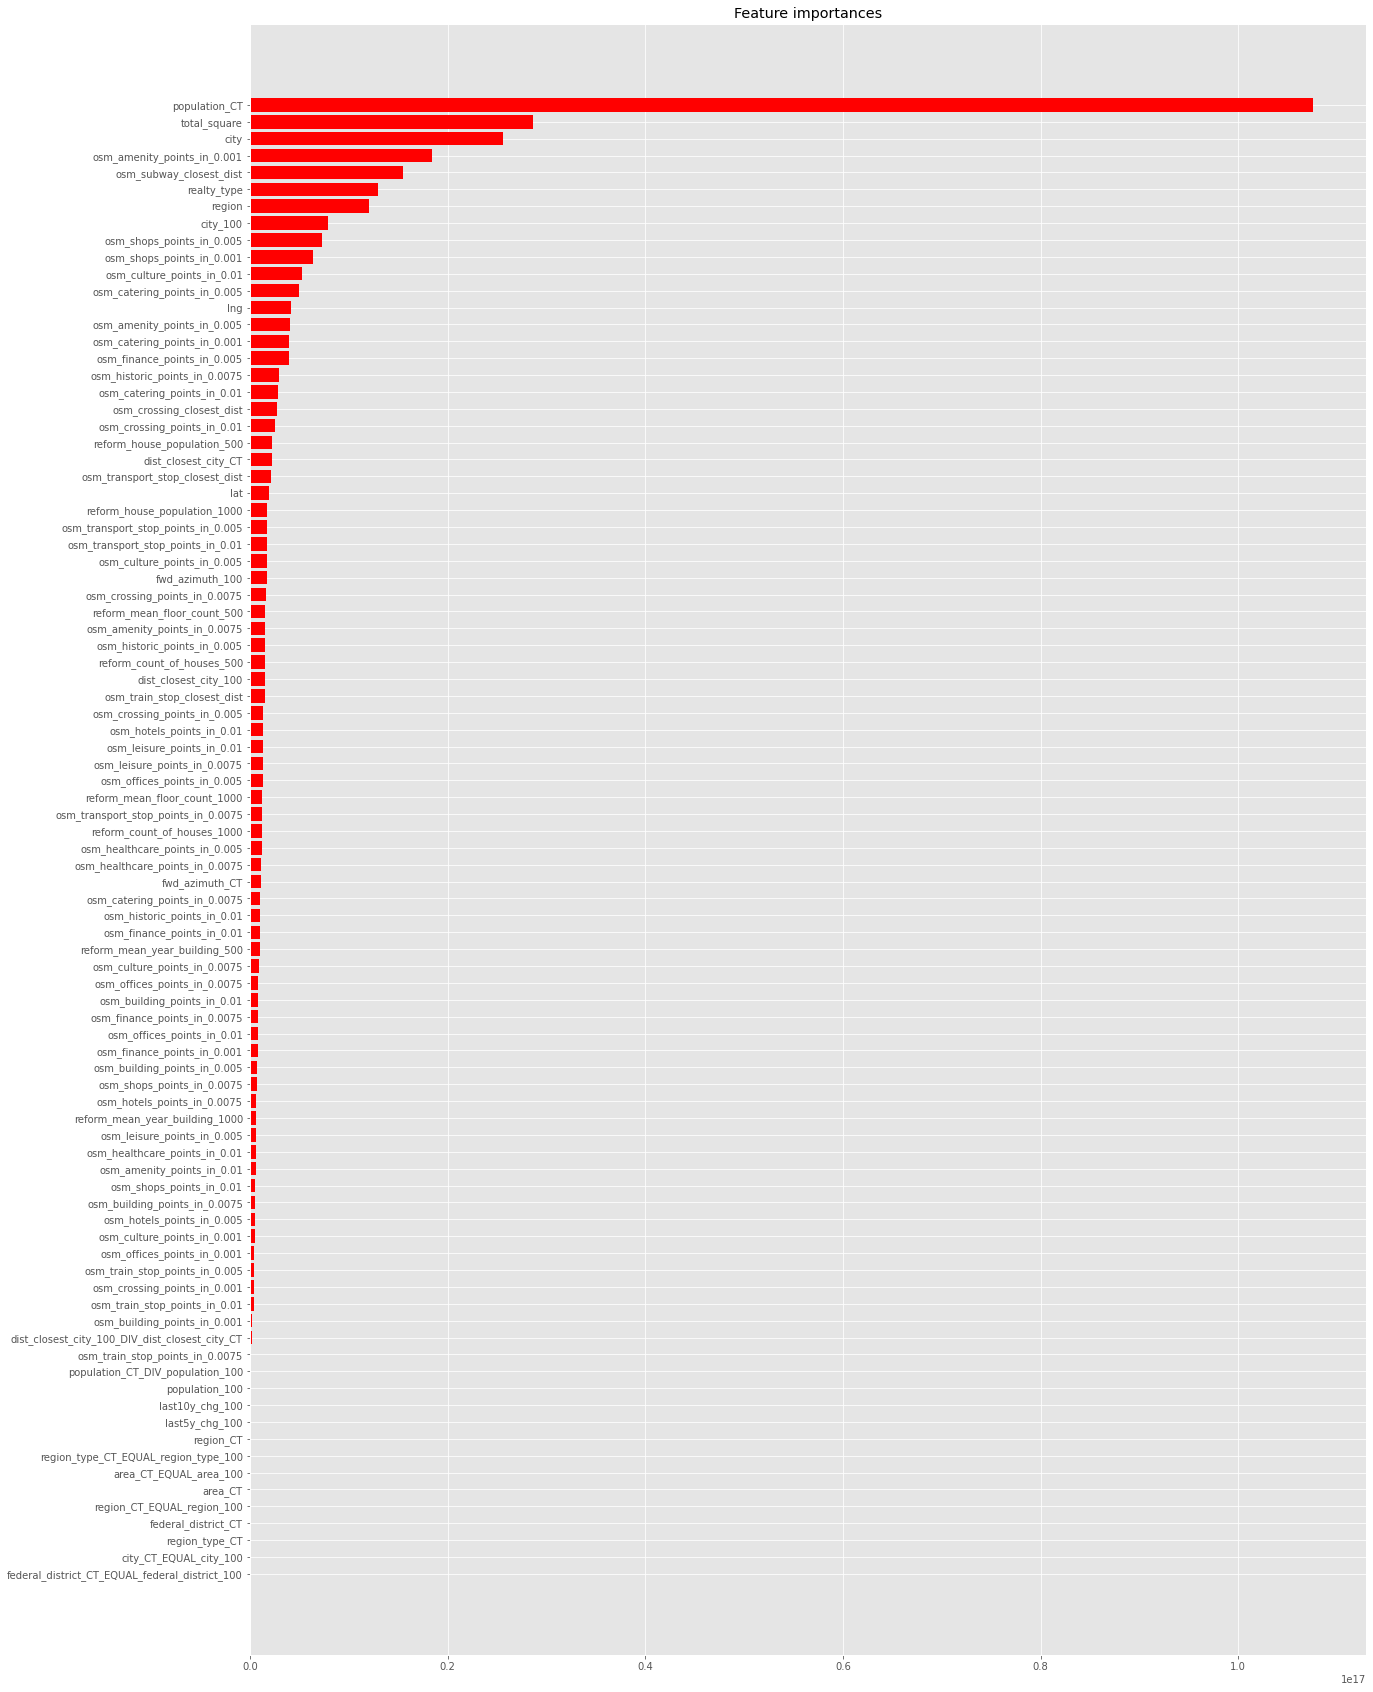

In [111]:
# Plot the feature importances of the forest
plt.figure(figsize=(20,30))
plt.title("Feature importances")
plt.barh(y=feature_importances.index, width=feature_importances['cv_iter_'],
       color="r", align="center")
# plt.title('Feature Importances over {} folds'.format(n_splits))  
plt.show()

In [ ]:
# 'region' - 7

# check

In [112]:
d = pd.DataFrame({'val': y_val, 'pred': lgb_pred})

In [113]:
d['error'] = d.apply(lambda x: (x['val'] - x['pred'])/x['pred'], axis=1)

In [114]:
len(d[d.val < d.pred]), len(d[d.val > d.pred])

(2817, 1676)

In [115]:
X_tr_copy = X_train_copy[X_train_copy.price_type==1]

In [116]:
d = pd.concat([d, X_tr_copy], axis=1)

In [117]:
encode_feat = ['population_CT', 'total_square']

In [118]:
d.loc[:, encode_feat] = ss.fit_transform(d[encode_feat])

In [119]:
d = d[['error', 'population_CT', 'total_square']]

In [120]:
len(y_train), len(y_val)

(279792, 4493)

In [121]:
# pd.DataFrame({'y_train': y_train, 'y_val' :y_val}).iplot(kind='hist', bins=30);

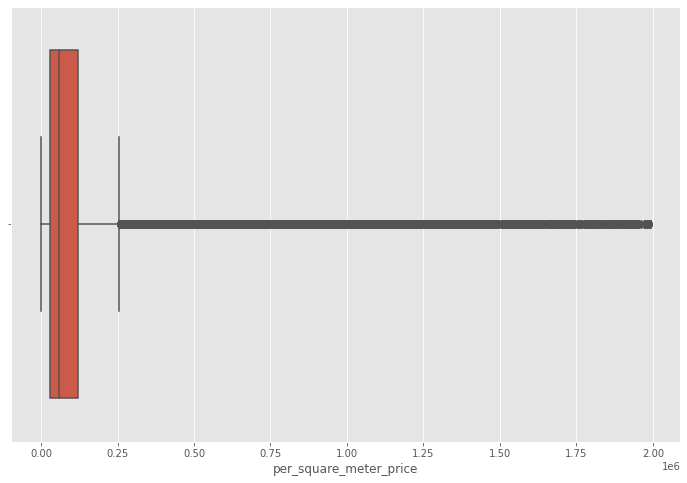

In [122]:
sns.boxplot(y_train)

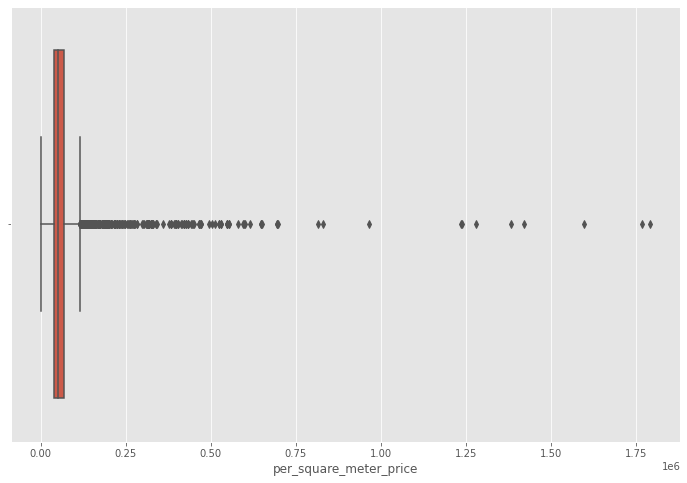

In [123]:
sns.boxplot(y_val)

In [124]:
fig = px.scatter(d[(d.error<0.5) & (d.population_CT < 1)], x='population_CT', y='total_square', 
                 color='error', 
#                  size='random_cat',
#                  hover_data=['NIFTY IT index'], # other columns to hover data,
                 color_continuous_scale=px.colors.sequential.YlOrRd # Greens
                )
fig.update_traces(marker_size=10)
fig.show()

In [125]:
[c for c in X_test_copy.columns if 'pop' in c]

['reform_house_population_1000',
 'reform_house_population_500',
 'population_CT',
 'population_100',
 'population_CT_DIV_population_100']

In [126]:
X_train_copy[X_train_copy.price_type==0].population_CT.hist()

In [127]:
X_train_copy[X_train_copy.price_type==1].population_CT.hist()

In [128]:
X_test_copy.population_CT.hist()

In [129]:
X_train_copy[X_train_copy.price_type==0].city.value_counts(1)[:20]

Москва             0.127679
Санкт-Петербург    0.049677
Краснодар          0.049292
Екатеринбург       0.029463
Новосибирск        0.023291
Челябинск          0.022238
Самара             0.022161
Казань             0.022063
Тюмень             0.021871
Видное             0.021707
Уфа                0.018456
Нижний Новгород    0.017312
Ростов-на-Дону     0.016128
Химки              0.014541
Одинцово           0.014308
Пермь              0.013502
Воронеж            0.013480
Красноярск         0.012121
Реутов             0.011166
Саратов            0.010505
Name: city, dtype: float64

In [130]:
X_train_copy[X_train_copy.price_type==1].city.value_counts(1)[:40]

Красноярск         0.121300
Иркутск            0.081460
Санкт-Петербург    0.077899
Томск              0.050523
Екатеринбург       0.042511
Кемерово           0.038282
Петрозаводск       0.035834
Нижний Новгород    0.035611
Новосибирск        0.028489
Брянск             0.026708
Белгород           0.025373
Курск              0.024037
Орёл               0.022702
Калуга             0.022702
Омск               0.020476
Пермь              0.017360
Уфа                0.014244
Калининград        0.014022
Новокузнецк        0.013577
Ангарск            0.013132
Саратов            0.012686
Иваново            0.012464
Самара             0.011574
Сургут             0.010238
Тюмень             0.010016
Барнаул            0.010016
Челябинск          0.010016
Владивосток        0.008680
Москва             0.008012
Сыктывкар          0.007567
Смоленск           0.007567
Ижевск             0.006900
Ростов-на-Дону     0.006454
Казань             0.005564
Железногорск       0.005342
Ярославль          0

In [131]:
X_test_copy.city.value_counts(1)[:40]

Красноярск         0.136180
Иркутск            0.077673
Санкт-Петербург    0.063551
Томск              0.046738
Петрозаводск       0.045730
Екатеринбург       0.041695
Нижний Новгород    0.032616
Кемерово           0.031607
Белгород           0.027572
Курск              0.027236
Новосибирск        0.026900
Омск               0.025219
Брянск             0.021856
Калуга             0.021520
Саратов            0.020511
Пермь              0.018494
Орёл               0.018157
Уфа                0.015804
Тюмень             0.015467
Сургут             0.013450
Челябинск          0.013450
Ангарск            0.012105
Ярославль          0.011096
Барнаул            0.011096
Москва             0.010424
Самара             0.010424
Новокузнецк        0.010087
Калининград        0.010087
Сыктывкар          0.007397
Ижевск             0.007061
Краснодар          0.006725
Смоленск           0.006389
Анапа              0.006389
Иваново            0.005716
Ростов-на-Дону     0.005380
Владивосток        0